#ch.2 Introductory Example

## 2.1 bit.ly의 1.usa.gov 데이터

In [1]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

#ubuntu의 SSL에러를 잡기위해 추가한 코드

In [2]:
pathUrl = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
#웹에 저장되어 있는 txt 파일을 URL로 접근

In [3]:
import urllib2
#urllib2 모듈 활용

In [4]:
response = urllib2.urlopen(pathUrl)

In [5]:
type(response)

instance

In [6]:
responseLines = response.readlines()

In [7]:
responseLines[0]

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [8]:
responseLines[1]

'{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n'

In [9]:
import json
#json모듈 활용 

In [10]:
records = [json.loads(line) for line in responseLines] 
#json 모듈의 loads 함수로 내려받은 샘플 파일을 한 줄씩 읽는다.

In [11]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [12]:
records[1]

{u'a': u'GoogleMaps/RochesterNY',
 u'c': u'US',
 u'cy': u'Provo',
 u'g': u'mwszkS',
 u'gr': u'UT',
 u'h': u'mwszkS',
 u'hc': 1308262393,
 u'hh': u'j.mp',
 u'l': u'bitly',
 u'll': [40.218102, -111.613297],
 u'nk': 0,
 u'r': u'http://www.AwareMap.com/',
 u't': 1331923249,
 u'tz': u'America/Denver',
 u'u': u'http://www.monroecounty.gov/etc/911/rss.php'}

In [13]:
records[0]['tz']

u'America/New_York'

#####America/New_York 앞에 있는 u는 유니코드를 의미

In [14]:
print records[0]['tz']

America/New_York


In [15]:
records[1]['tz']

u'America/Denver'

In [16]:
records[1]['ll']

[40.218102, -111.613297]

##2.1.1 순수 파이썬으로 표준시간대 세어보기

In [17]:
#time_zones = [rec['tz'] for rec in records]          <<-----records의 아이템이 모두 표준시간대 필드를 포함하고 있는 것이 아니기 때문에 에러발생

In [18]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

#위와 같이  if 'tz' in rec을 추가 하면  에러 해결

In [19]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [20]:
from collections import Counter

In [21]:
#time_zones를 순회하면서 표준시간대를 센 후 파이썬 자료 구조에 저장
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [22]:
#파이썬 표준 라이브러리에 익숙하다면 아래와 같이 작성해도 된다.
from collections import defaultdict
def get_dounts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [23]:
#가장 많이 등장하는 상위 10개의 표준시간대를 구하는 방법
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [24]:
counts = get_counts(time_zones)

In [25]:
counts['America/New_York']

1251

In [26]:
len(time_zones)

3440

In [27]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

####파이썬 표준 라이브러리의 collections. Counter 클래스 이용한 방법

In [28]:
from collections import Counter

In [29]:
counts = Counter(time_zones)

In [30]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

##2.1.2 pandas로 표준시간대 세어보기

####records를 가지고 DataFrame을 만드는 방법

In [31]:
from pandas import DataFrame, Series


In [32]:
import pandas as pd; import numpy as np

In [33]:
frame = DataFrame(records)

In [34]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [35]:
frame[0:2]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [36]:
frame['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [37]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [38]:
tz_counts = frame['tz'].value_counts()

In [39]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [40]:
%matplotlib inline

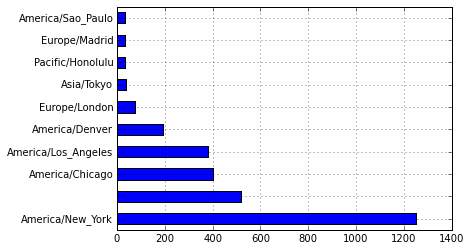

In [41]:
#plot 메서드를 이용하면 count 객체에 대한 수평 막대 그래프를 만들수 있다.
tz_counts[:10].plot(kind='barh', rot=0)

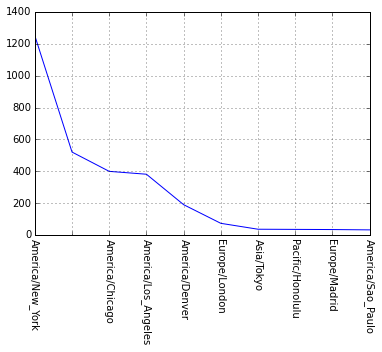

In [42]:
tz_counts[:10].plot(kind='line', rot=270)

####URL을 축약하는 데 사용한 브라우저, 단말기, 애플리케이션에 대한 정보를 담은필드

In [43]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [44]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [45]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

--------------------------------------------------------------------

In [46]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [47]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [48]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

------------------------------------------------------_

####<윈도우 사용자와 비윈도우 사용자 그룹으로 나누기>

In [49]:
#agent 문자열이 'Window'를 포함하면 윈도우 사용자라고 가정하고 agent 값이 없는 데이터는 제외
cframe = frame[frame.a.notnull()]

In [50]:
#각 행이 윈도우인지 아닌지 검사
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [51]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [52]:
#표준시간대와 운영체제를 기준으로 데이터를 그룹화
by_tz_os = cframe.groupby(['tz', operating_system])

In [53]:
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [54]:
#결과를 unstack 함수를 이용해 표로 재배치
agg_counts = by_tz_os.size().unstack().fillna(0)

In [55]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [56]:
indexer = agg_counts.sum(1).argsort()

In [57]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [58]:
#agg_counts에 take를 사용해 행을 정렬된 순서 그대로 선택하고 마지막 10개 행만 잘란낸다.
count_subset = agg_counts.take(indexer)[-10:]

In [59]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


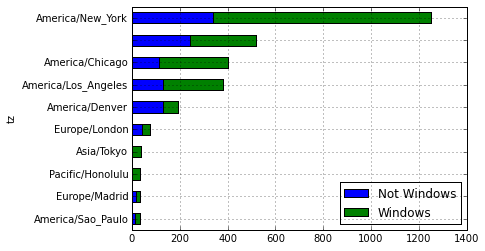

In [60]:
count_subset.plot(kind='barh', stacked=True)

In [61]:
nored_subset = count_subset.div(count_subset.sum(1), axis=0)

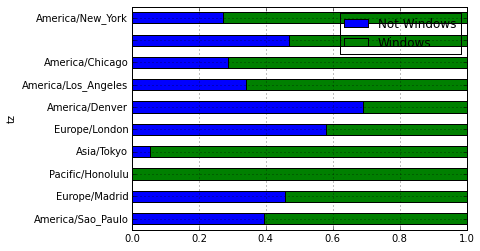

In [62]:
nored_subset.plot(kind='barh', stacked=True)

##2.2 MovieLens의 영화 평점 데이터

In [63]:
#URL을 사용하여 파일 읽기
pathUrl3 = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/users.dat'

In [64]:
import urllib

In [65]:
response = urllib.urlopen(pathUrl3)

In [66]:
responseLines = response.readlines()

In [67]:
responseLines

['1::F::1::10::48067\n',
 '2::M::56::16::70072\n',
 '3::M::25::15::55117\n',
 '4::M::45::7::02460\n',
 '5::M::25::20::55455\n',
 '6::F::50::9::55117\n',
 '7::M::35::1::06810\n',
 '8::M::25::12::11413\n',
 '9::M::25::17::61614\n',
 '10::F::35::1::95370\n',
 '11::F::25::1::04093\n',
 '12::M::25::12::32793\n',
 '13::M::45::1::93304\n',
 '14::M::35::0::60126\n',
 '15::M::25::7::22903\n',
 '16::F::35::0::20670\n',
 '17::M::50::1::95350\n',
 '18::F::18::3::95825\n',
 '19::M::1::10::48073\n',
 '20::M::25::14::55113\n',
 '21::M::18::16::99353\n',
 '22::M::18::15::53706\n',
 '23::M::35::0::90049\n',
 '24::F::25::7::10023\n',
 '25::M::18::4::01609\n',
 '26::M::25::7::23112\n',
 '27::M::25::11::19130\n',
 '28::F::25::1::14607\n',
 '29::M::35::7::33407\n',
 '30::F::35::7::19143\n',
 '31::M::56::7::06840\n',
 '32::F::25::0::19355\n',
 '33::M::45::3::55421\n',
 '34::F::18::0::02135\n',
 '35::M::45::1::02482\n',
 '36::M::25::3::94123\n',
 '37::F::25::9::66212\n',
 '38::F::18::4::02215\n',
 '39::M::18

In [68]:
import pandas as pd

In [69]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']

In [159]:
#각 테이블을 pandas.read_table 함수를 사용해 DataFrame 객체를 불러오기
users = pd.read_table('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/users.dat', sep='::', header=None, names=unames)

In [71]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

In [72]:
#각 테이블을 pandas.read_table 함수를 사용해 DataFrame 객체를 불러오기
ratings = pd.read_table('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/ratings.dat', sep='::', header=None, names=rnames)

In [73]:
mnames = ['movie_id', 'title', 'genres']

In [74]:
#각 테이블을 pandas.read_table 함수를 사용해 DataFrame 객체를 불러오기
movies = pd.read_table('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/movies.dat', sep='::', header=None, names=mnames)

In [75]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [76]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [77]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [78]:
#ratings 테이블와 users 테이블을 병합하고 그 결과를 다시 movies 테이블과 병합
data = pd.merge(pd.merge(ratings, users), movies)

In [79]:
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [80]:
#0번째 행의 정보
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [81]:
#성별에 따른 각영화의 평균 평점을 구하기위해 pivot_table 메서드를 사용
#책의 rows, cols가 index, colums로 바뀜
#aggfunc은 default값이 mean 이며, 값을 어떻게 나타낼지 결정하는 함수
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [82]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [83]:
#데이터를 영화 제목으로 그룹화하고 size()  함수를 사용해서 제목별 평점 정보를 건수를 Sries 객체로 얻어낸다.
ratings_by_title = data.groupby('title').size()

In [84]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [85]:
#250건 이상의 평점 정보가 있는 영화
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [86]:
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)', 
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [87]:
#250건 이상의 평점 정보가 있는 영화의 색인은 mean_ratings에서 항목을 선택하기 위해 사용
mean_ratings = mean_ratings.ix[active_titles]

In [88]:
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [89]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)

In [90]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


-----------------------------------------------------


##2.2.1 평점 차이 구하기

In [91]:
#mean_ratings에 평균 평점의 차이를 담을 수 있는 열을 하나 추가하고, 그 열을 기준으로 정렬
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [92]:
sorted_by_diff = mean_ratings.sort_index(by='diff')

In [93]:
sorted_by_diff[:15] 

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [94]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


--------------------------------------------------


####호불호가 극명하게 나뉘는 영화 찾기

In [95]:
#평점의 표준편차
rating_std_by_title = data.groupby('title')['rating'].std()

In [96]:
#active_titles만 선택
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [97]:
# 내림차순으로 정렬
rating_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

##2.3 신생아 이름

In [98]:
import pandas as pd

In [99]:
names1880 = pd.read_csv('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/names/yob1880.txt', names=['name', 'sex', 'births'])

In [100]:
names1880[:8]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414


In [101]:
#성별에 따라 그룹화하여 birth값을 구함 (해당 연도의 전체 출생수)
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [102]:
#2010년의 데이터가 가장 마지막
years = range(1880, 2011)

In [103]:
pieces = []

In [104]:
columns = ['name', 'sex', 'births']

In [105]:
for year in years:
    path = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [106]:
#하나의 DataFrame으로 모든 데이터를 연결시키면
names = pd.concat(pieces, ignore_index=True)
#read_csv를 통해서 읽어온 원래 행 순서는 몰라도 되므로 index를 무시

In [107]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [108]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [109]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


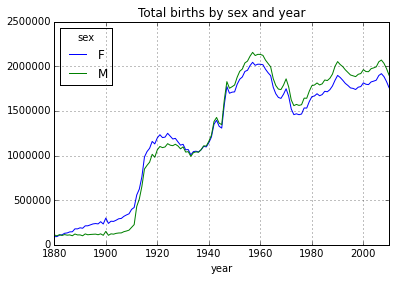

In [110]:
total_births.plot(title='Total births by sex and year')

In [111]:
#함수 정의
def add_prop(group):
    #Integer division floors
    births = group.births.astype(float)   #birth를 float타입으로
    
    group['prop'] = births/ births.sum()  #births를 births전체의 합으로 나누면 prop라는 출생률 계산
    return group

In [112]:
names = names.groupby(['year', 'sex']).apply(add_prop)  #새로운 열을 추가

In [113]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [114]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [115]:
#함수 정의
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]  #birth으로 내림차순 정렬

grouped = names.groupby(['year', 'sex'])  #year와 sex로 그룹화 하여 top1000 출력하도록
top1000 = grouped.apply(get_top1000)

In [116]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

###2.3.1 이름 유행 분석

In [117]:
#상위 1,000개의 데이터를 남짜아이와 여자아이로 분리리리
boys = top1000[top1000.sex == 'M']

In [118]:
girls = top1000[top1000.sex == 'F']

In [119]:
#연도와 이름에 대한 전체 출생수를 피벗 테이블로 만듬
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [120]:
total_births[:10]

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


In [121]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d60178c50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7d5ffaa9d0>], dtype=object)

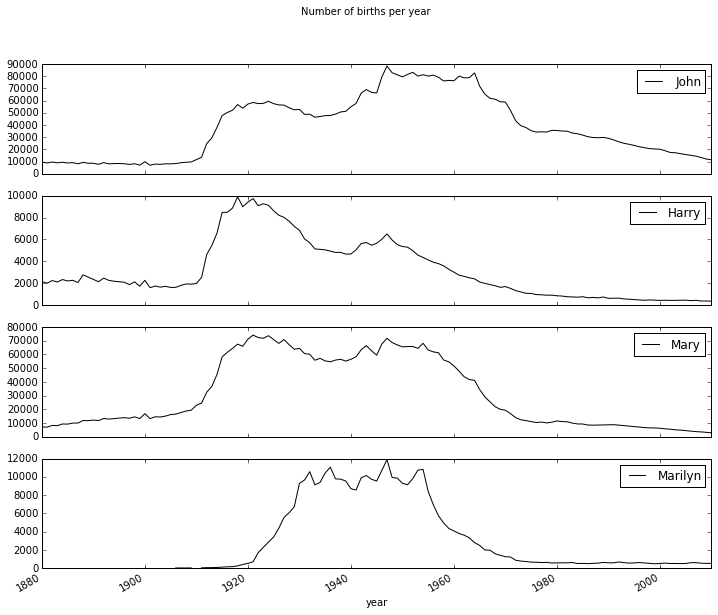

In [122]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

#####다양한 이름을 사용하는 경향 파악하기

In [123]:
#인기 있는 이름 1,000개가 전체 출생수에서 차지하는 비율을 그래프로 그리기
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

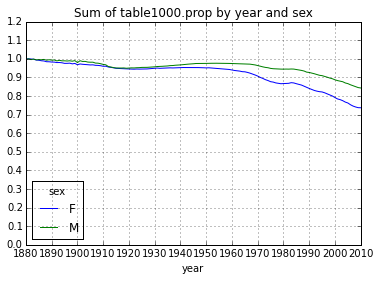

In [124]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [125]:
#2010년도에 인기있는 이름순으로 정렬
df = boys[boys.year == 2010]

In [126]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [127]:
#prop을 내림차순으로 정렬하고 나서 전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지 Numpy를 사용하여 알아보기
#prop의 누계를 cumsum에 저장하고  searchsorted 메서드를 호출해 정렬된 상태에서 누계까 0.5가 되는 위치를 구한다.
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum() 

In [128]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [129]:
prop_cumsum.searchsorted(0.5) + 1  #색인의 경우 시작을 0부터 하기 때문에 +1을 한다.

array([117])

In [130]:
prop_cumsum.searchsorted(0.5)[0] + 1  #searchsorted 함수는 return 값이 배열형이다. 그러므로 다으모가 같이 int형으로 뽑아 내기 위해서는
                                      #searchsorted 배열의 0 번째 값을 불러 오게 해야함

117

In [131]:
df = boys[boys.year == 1900]

In [132]:
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()

In [133]:
in1900.searchsorted(0.5)[0] + 1

25

In [134]:
#함수 선언
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1    #배열형 이므로 다음과 같이 0번째 값이 나오도록 한다.

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [135]:
diversity.head()  #diversity[:5]와 같은 결과

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


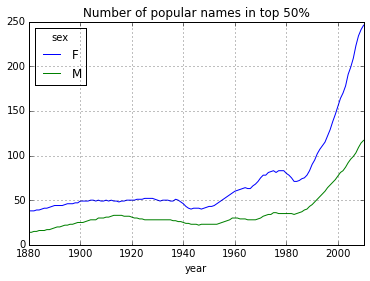

In [136]:
diversity.plot(title="Number of popular names in top 50%")  #numeric searchsorted는 배열의 위치를 찾는 것이기 때문에 int형이 아님
#오류...

####'마지막 글자'의 변화

In [137]:
#name 열에서 마지막 글자를 추출
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [138]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [139]:
subtable.head()  #subtable[:5]와 같은 효과

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b               NaN     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

In [140]:
#전체 출생수에서 성별로 각각의 마지막 글자가 차지하는 비율을 계산하기 위해 전체 출생수로 정규화
subtable.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: float64

In [141]:
letter_prop = subtable / subtable.sum().astype(float)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7d5fdf1550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d5fbf17d0>)

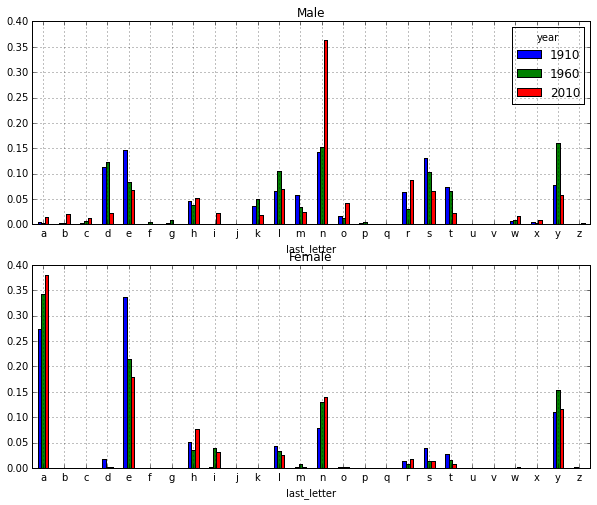

In [142]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male'), letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [143]:
#출생 연도와 성별로 다시 정규화하고 남자아이 이름에서 몇 글자를 선택하여 이 이름을 열로 하는 시계열 데이터로 변환
letter_prop = table / table.sum().astype(float)

In [144]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [145]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


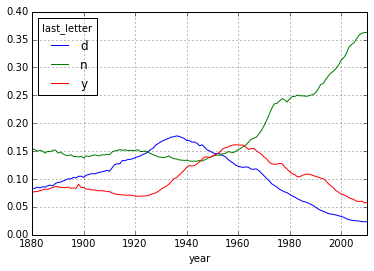

In [146]:
#plot 메서드를 이용해서 연도별 그래프 제작
dny_ts.plot()

#####남자 이름과 여자 이름이 바뀐경우

In [147]:
#top1000 데이터를 이용해 'lesl'로 시작하는 이름이 포함되는 리스트 제작
all_names = top1000.name.unique()

In [148]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [149]:
lesley_like = all_names[mask]

In [150]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [151]:
#이름을 추려내어 이름별로 출생수를 구하고 상대 도수를 확인
filtered = top1000[top1000.name.isin(lesley_like)]

In [152]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [153]:
#성별과 연도별로 모은 다음 출생 연도로 정규화
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [154]:
table = table.div(table.sum(1), axis=0)

In [155]:
table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


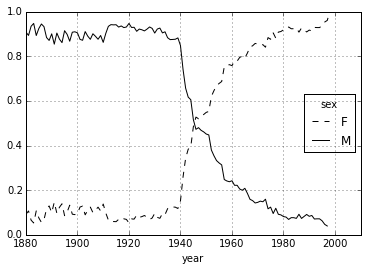

In [156]:
#시대별로 성별 변화 추이를 그래프로 그리기
table.plot(style={'M': 'k-', 'F': 'k--'})  #남자는 실선으로, 여자는 점선으로 표